In [135]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\ajesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
df=pd.read_csv('Data/titanic.csv')


In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


1.##### Missing Data Not At Random(MNAR): Systematic missing values There is absolutely some relationship between the data missing and any other values observed or missing with in the data set

In [36]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [37]:
df['cabin_null'].mean()

0.7710437710437711

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [40]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Missing AT Random(MAR)

In [ ]:
### All the techniques of handling missing values

1. Mean/ Median/ Mode replacement
2. Random Sample Immputation
3. Capturing NAN values with new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories Imputation



Mean/Median/Mode Imputation

When should we apply ? Mean/Median/Mode imputation has the assumption that the data are missing completely at Random (MCAR). We solve this by replacing the NAN with most frequent occurance of the variable

In [43]:
df1=df[['Age','Fare','Survived']]

In [44]:
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [45]:
df1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [46]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    
    

In [51]:
median=df1.Age.median()

In [52]:
impute_nan(df1,'Age',median)

C:\Users\ajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df1.head()

,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [57]:
print(df1['Age'].std())
print(df1['Age_median'].std())

14.526497332334044
13.019696550973194


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

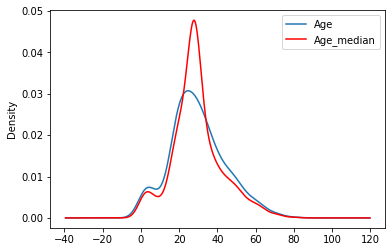

In [63]:
fig=plt.figure()
ax=fig.add_subplot(111)
df1['Age'].plot(kind='kde',ax=ax)
df1['Age_median'].plot(kind='kde',ax=ax,color='red')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')


# Advantage and Disadvantage of Mean/Median Imputation

Advantage
------
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset

Disadvantage
-----------

1. Change or Distortion of the original variance
2. Impacts corelation

# Randome Sample Imputation

Aim: Random sample imputation consists of taking random observation from dataset and we use this observation to replace the nan values

When it should be used? It assumes that the data is missing completely at random

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [65]:
df_rand=df[['Age','Fare','Survived']]

In [66]:
df_rand.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [69]:
df_rand.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [70]:
df_rand.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [71]:
df_rand['Age'].isnull().sum()

177

In [72]:
df_rand['Age'].dropna().sample(df_rand['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [73]:
df_rand['Age'].isnull().sum()

177

In [76]:
df_rand[df_rand['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [92]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_Random"]=df[variable]
    
    ## It will have the random value to fill na
    random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_Random']=random_sample
    

In [79]:
median=df.Age.median()
median

28.0

In [100]:
df_rand.head()

,Age,Fare,Survived,Age_median,Age_Random,Age_random,AgeRandom
0,22.0,7.2500,0,22.0,22.0,NaN,NaN
1,38.0,71.2833,1,38.0,38.0,NaN,NaN
2,26.0,7.9250,1,26.0,26.0,NaN,NaN
3,35.0,53.1000,1,35.0,35.0,NaN,NaN
4,35.0,8.0500,0,35.0,35.0,NaN,NaN


In [103]:
df_rand1=df_rand.drop(columns=['Age_median','Age_Random','Age_random','AgeRandom'], axis=1)

In [104]:
df_rand1

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


In [105]:
impute_nan(df_rand1,'Age',median)

In [107]:
df_rand1.head()

,Age,Fare,Survived,Age_median,Age_Random
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0


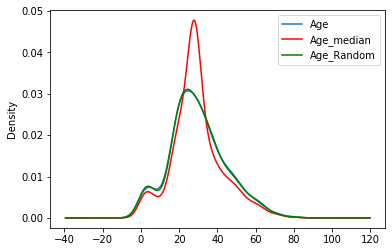

In [109]:
fig=plt.figure()
ax=fig.add_subplot(111)
df_rand1['Age'].plot(kind='kde',ax=ax)
df_rand1.Age_median.plot(kind='kde', ax=ax, color='red')
df_rand1.Age_Random.plot(kind='kde', ax=ax, color='green')
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')


Advantages

1. Easy to implement
2. There is less distortion in variance

Disadvantage

1. Every situatin randomness wont work

# Computing NaN with new feature

It work well if the data missing is not completely at random

In [111]:


df_newFeature=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df_newFeature.head()



,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [112]:
df_newFeature['Age_NaN']=np.where(df_newFeature['Age'].isnull(),1,0)

In [116]:
df_newFeature['Age'].fillna(df_newFeature.Age.median(),inplace=True)

In [117]:
df_newFeature

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


Advantages

1. Easy to Implement
2. Capture the importance of the missing values

Disadvantage

1. Creating additionalfeature (Curse of dimesnionalities)

# End of distribution Imputation

In [118]:
df_ed=df[['Age','Fare','Survived']]

In [119]:
df_ed.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


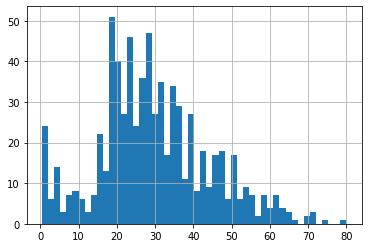

In [121]:
df_ed.Age.hist(bins=50)

In [122]:
extreme=df_ed.Age.mean()+3*df_ed.Age.std()

In [123]:
extreme

73.27860964406095

In [128]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df.Age.fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [129]:
impute_nan(df_ed,'Age',df_ed.Age.median(),extreme)

C:\Users\ajesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ajesh\Anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [130]:
df_ed

,Age,Fare,Survived,Age_end_distribution
0,22.0,7.2500,0,22.00000
1,38.0,71.2833,1,38.00000
2,26.0,7.9250,1,26.00000
3,35.0,53.1000,1,35.00000
4,35.0,8.0500,0,35.00000
...,...,...,...,...
886,27.0,13.0000,0,27.00000
887,19.0,30.0000,1,19.00000
888,28.0,23.4500,0,73.27861
889,26.0,30.0000,1,26.00000


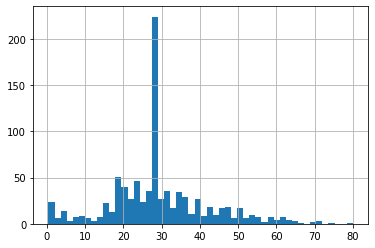

In [132]:
df_ed.Age.hist(bins=50)

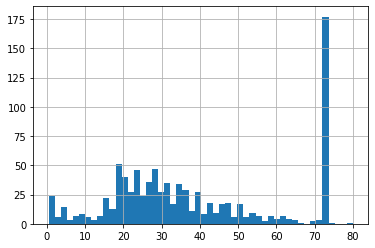

In [133]:
df_ed['Age_end_distribution'].hist(bins=50)

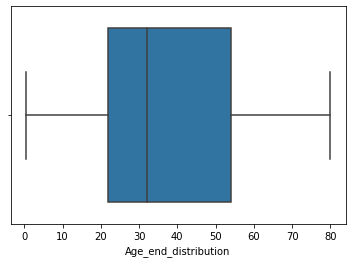

In [136]:
sns.boxplot('Age_end_distribution',data=df_ed)

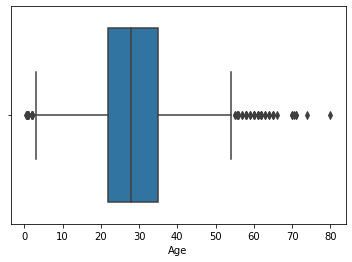

In [137]:
sns.boxplot('Age',data=df_ed)